In [66]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data source 

In [68]:
df_0 = pd.read_excel(r"C:\Users\billi\Desktop\BIOGAS DATASET\clean_Biogas_Data.xlsx")
df_0.head()

,Digester Type,Animal/Farm Type(s),Biogas Generation Estimate (cu-ft/day),Quantity,Total waste kg/day
0,Covered Lagoon,Swine,1814400,4200,23940.0
1,Complete Mix,Dairy,3454500,30000,2040000.0
2,Covered Lagoon,Dairy,600000,15500,1054000.0
3,Covered Lagoon,Dairy,50000,1700,115600.0
4,Covered Lagoon,Dairy,270000,9700,659600.0


# split data 

In [70]:

features_bio = df_0[['Digester Type', 'Animal/Farm Type(s)', 'Quantity', 'Total waste kg/day']]


In [71]:
features_bio.head()

,Digester Type,Animal/Farm Type(s),Quantity,Total waste kg/day
0,Covered Lagoon,Swine,4200,23940.0
1,Complete Mix,Dairy,30000,2040000.0
2,Covered Lagoon,Dairy,15500,1054000.0
3,Covered Lagoon,Dairy,1700,115600.0
4,Covered Lagoon,Dairy,9700,659600.0


In [72]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Digester Type                           232 non-null    object 
 1   Animal/Farm Type(s)                     232 non-null    object 
 2   Biogas Generation Estimate (cu-ft/day)  232 non-null    int64  
 3   Quantity                                232 non-null    int64  
 4   Total waste kg/day                      232 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.2+ KB


# Encoding

In [74]:
features_bio['Animal/Farm Type(s)'].unique()

array(['Swine', 'Dairy', 'Cattle', 'Cattle; Swine', 'Cattle; Dairy',
       'Dairy; Swine', 'Poultry', 'Dairy; Poultry; Swine'], dtype=object)

In [75]:
features_bio['Digester Type'].unique()

array(['Covered Lagoon', 'Complete Mix', 'Horizontal Plug Flow',
       'Mixed Plug Flow', 'Induced Blanket Reactor',
       'Unknown or Unspecified', 'Vertical Plug Flow',
       'Fixed Film/Attached Media', 'Plug Flow - Unspecified',
       'Modular Plug Flow'], dtype=object)

<Axes: xlabel='Digester Type'>

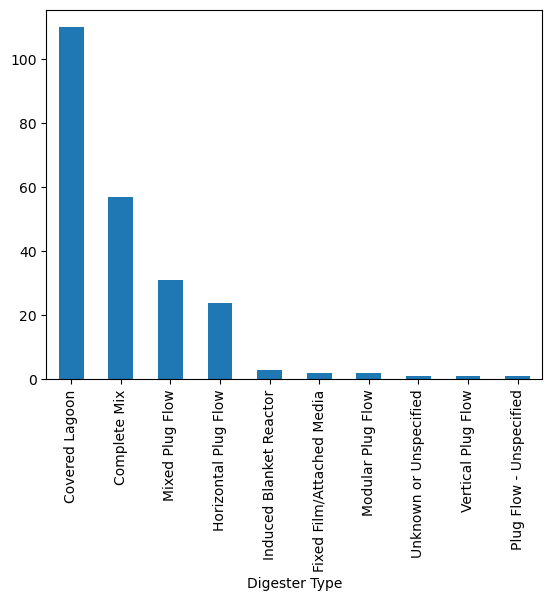

In [76]:
features_bio['Digester Type'].value_counts().plot(kind='bar')

In [77]:
# features_bio['Digester Type'].replace(['Covered Lagoon', 'Complete Mix', 'Horizontal Plug Flow',
#        'Mixed Plug Flow', 'Induced Blanket Reactor', 'Unknown or Unspecified', 'Vertical Plug Flow',
#        'Fixed Film/Attached Media', 'Plug Flow - Unspecified', 'Modular Plug Flow'],[0,1,2,3,4,5,6,7,8,9], inplace=True)

In [78]:
# convert categorical to one-hot encoding
# le = preprocessing.LabelEncoder()
# Digester_Type = le.fit_transform(df_0['Digester Type'])
dummies = pd.get_dummies(features_bio[['Digester Type','Animal/Farm Type(s)']],dtype =float)
merged = pd.concat([features_bio,dummies], axis = 'columns')
# merged.drop([['Digester Type', 'Animal/Farm Type(s)']], axis= 0)
merged.head()

,Digester Type,Animal/Farm Type(s),Quantity,Total waste kg/day,Digester Type_Complete Mix,Digester Type_Covered Lagoon,Digester Type_Fixed Film/Attached Media,Digester Type_Horizontal Plug Flow,Digester Type_Induced Blanket Reactor,Digester Type_Mixed Plug Flow,...,Digester Type_Unknown or Unspecified,Digester Type_Vertical Plug Flow,Animal/Farm Type(s)_Cattle,Animal/Farm Type(s)_Cattle; Dairy,Animal/Farm Type(s)_Cattle; Swine,Animal/Farm Type(s)_Dairy,Animal/Farm Type(s)_Dairy; Poultry; Swine,Animal/Farm Type(s)_Dairy; Swine,Animal/Farm Type(s)_Poultry,Animal/Farm Type(s)_Swine
0,Covered Lagoon,Swine,4200,23940.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Complete Mix,Dairy,30000,2040000.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Covered Lagoon,Dairy,15500,1054000.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Covered Lagoon,Dairy,1700,115600.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Covered Lagoon,Dairy,9700,659600.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [79]:
#le = preprocessing.LabelEncoder()
#Animal_Type = le.fit_transform(df_0['Animal/Farm Type(s)'])


In [80]:
#df_0.iloc[:, 0] = Digester_Type

In [81]:
#df_0.head()

In [82]:
#df_0.iloc[:, 1] = Animal_Type

In [83]:
#df_0.head(100)

# Split Dataset into Training and Test dataset

In [85]:
features_bio = ['Digester Type', 'Animal/Farm Type(s)', 'Total waste kg/day']
x = df_0[features_bio]
y = df_0['Biogas Generation Estimate (cu-ft/day)']

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Standardize the input Data

In [88]:
scaler = StandardScaler()
scaler.fit(x)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

ValueError: could not convert string to float: 'Covered Lagoon'

# Model Training 

In [ ]:
model_R = LinearRegression()
model_R.fit(x_train, y_train)

#model_R = LogisticRegression()
#model_R.fit(x_train, y_train)


# Model Evaluation

In [ ]:
predicted= model_R.predict(x_test)
#predicted_prob = model_R.predict_proba(x_test)

# Performance Evaluation

In [ ]:
accuracy = metrics.accuracy_score(predicted, y_test)
print ('Accuracy: %.3f' % (accuracy*100))

#predicted_classes = (predicted > 0.5).astype(int)  # Binarizing the predictions
#predicted_classes = np.argmax(predicted_prob, axis=1)
#accuracy = metrics.accuracy_score(predicted_classes, y_test)
#print('Accuracy: %.3f' % (accuracy*100))